# Continuous Assemblies: Logistics assemblies

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In this notebook we will talk about continuous assemblies and in specific we will board the the assemblies of a two logistics regressions.

### We import all the libraries

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import warnings

In [2]:
warnings.filterwarnings("ignore")

### Creation of all the points to train and test the model

We set the seed

In [3]:
np.random.seed(10)

Creation of the points

In [4]:
v = 4

In [5]:
#---------------------------------------------------

#Parameters of the model

a = -2
b = 10

#---------------------------------------------------

N = 50

#---------------------------------------------------

h = (b-a)/N

#---------------------------------------------------

# Seting the first value of the domain

x = a - h

#---------------------------------------------------

X = []
y = []

#---------------------------------------------------

for i in range(N + 1):

    x = round(x + h, 1)

    if (2 <= x) and (x <= 6):
        
        X.append(x)
        y.append(np.random.choice(2, p=[0.15, 0.85]))
    
    else:

        X.append(x)
        y.append(np.random.choice(2, p=[0.85, 0.15]))

#---------------------------------------------------

Creation of dataframe

In [6]:
df = pd.DataFrame()

In [7]:
df['X'] = pd.Series(X).astype(float)
df['y'] = pd.Series(y).astype(float)

In [8]:
df

,X,y
0,-2.0,0.0
1,-1.8,0.0
2,-1.6,0.0
3,-1.4,0.0
4,-1.2,0.0
5,-1.0,0.0
6,-0.8,0.0
7,-0.6,0.0
8,-0.4,0.0
9,-0.2,0.0


Graph of these points

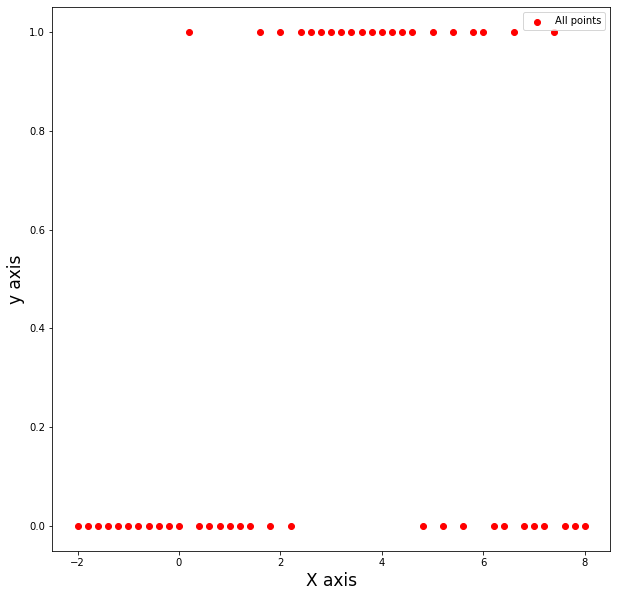

In [9]:
figure(figsize=(10,10))
plt.scatter(df['X'], df['y'], color = 'red', label = 'All points')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

Separating the train set and the test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22)

In [11]:
train = pd.DataFrame()
test = pd.DataFrame()

In [12]:
train['X'] = pd.Series(X_train).astype(float)
train['y'] = pd.Series(y_train).astype(float)

In [13]:
test['X'] = pd.Series(X_test).astype(float)
test['y'] = pd.Series(y_test).astype(float)

Graph of train and test set

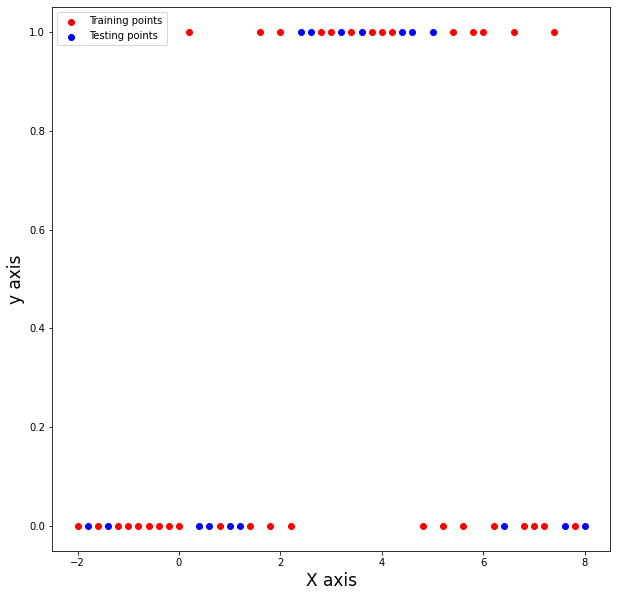

In [14]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

### Mathematical Development

First of all, we must to say exists two ways of to do this aasemble. The first "Left to the right" and the second "Right to the left".

### $ \underline{1. \ Left \ \ to \ \ the \ \ right:} $

We will consider two functions: 

$ f_1(x) = \cfrac{1}{1 + e^{-(\alpha_1^{left} \cdot x + \alpha_0^{left})}} \ \ \  $ for $ \ \ \ a \leq x \leq v $

$ f_2(x) = \cfrac{1}{1 + e^{-(\beta_1^{left} \cdot x + \beta_0^{left})}} \ \ \  $ for $ \ \ \ v \leq x \leq b $

*$\underline{Step \ 1:}$* We estimate the values of $ \alpha_1^{left} $ and $ \alpha_0^{left}$. From now on, we will write the known values with green color and the unkown values with red color.

*$\underline{Step \ 2:}$* For the union of the first and second function to be continued we need the following equation is fulfilled:

$ f_1(v) = f_2(v) $

$ \Rightarrow $

$ \cfrac{1}{1 + e^{-(\alpha_1^{left} \cdot v + \alpha_0^{left})}} = \cfrac{1}{1 + e^{-(\beta_1^{left} \cdot v + \beta_0^{left})}} $

$ \Rightarrow $

$ 1 + e^{-(\alpha_1^{left} \cdot v + \alpha_0^{left})} = 1 + e^{-(\beta_1^{left} \cdot v + \beta_0^{left})} $

$ \Rightarrow $

$ (\alpha_1^{left} \cdot v + \alpha_0^{left}) = (\beta_1^{left} \cdot v + \beta_0^{left}) $

$ \Rightarrow $

$ \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}} = \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v} + \textcolor{red}{\beta_0^{left}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\beta_0^{left}} = \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}} - \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v}} \ \ \ (1)  $

Substituting this result in $ f_2(x)$ we obtain:

$ f_2(x) = \cfrac{1}{1 + e^{-(\textcolor{red}{\beta_1^{left}} \cdot x + \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}} - \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v})}}  $ 

$ \Rightarrow $

$ f_2(x) = \cfrac{1}{1 + e^{-(\textcolor{red}{\beta_1^{left}} \cdot [x  - \textcolor{green}{v}] + [\textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}}] )}} $ 

We create the next new variable:

$ W_{2} = x - \textcolor{green}{v} $

Now we have:

$ f_2(x) = \cfrac{1}{1 + e^{-(\textcolor{red}{\beta_1^{left}} \cdot [\textcolor{green}{W_2}] + [\textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}}] )}} $ 



We take the same idea from which we deduce the "classic" logistic regression. We want to fit the next function to predict the class of the elements of the second section. For simplicity, we assume we have to predict the labels $y$ from the function which depends of an $beta$ arbitrary and $X$ arbitrary too.

$ \textbf{Matematical \ deduction} $

The function to fit is:

$ h(\beta) = \cfrac{1}{1 + e^{-(\beta \cdot x+c)}} = \sigma(\beta \cdot x + c) \ \Rightarrow \ h_i(\beta) = \cfrac{1}{1 + e^{-(\beta \cdot x_i+c)}} = \sigma(\beta \cdot x_i + c) $

The loss function is:

$ J(\beta) = - \cfrac{1}{M} \sum_{i=1}^M y_i \cdot ln(h_i(\beta)) - \cfrac{1}{M} \sum_{i=1}^M (1 - y_i) \cdot ln(1 - h_i(\beta)) $

$ J'(\beta) = - \cfrac{1}{M} \sum_{i=1}^M x_i \cdot y_i \cdot (1 - h_i(\beta)) + \cfrac{1}{M} \sum_{i=1}^M x_i \cdot (1 - y_i) \cdot h_i(\beta) $

We will use the gradient method to obtain the value of $ \beta^{*} $. The iteration is of the form:

$ \beta_{k+1} = \beta_{k} - \eta \cdot J'(\beta_{k}) $

# Training (Left to Right)

In [15]:
f_1 = (train['X'] <= v)
f_2 = (train['X'] > v)

In [16]:
f_1_test = (test['X'] <= v)
f_2_test = (test['X'] > v)

**a. First section**

In [17]:
X_1_left = train[f_1][['X']].values
y_1_left = train[f_1]['y'].values

In [18]:
lreg_left_1 = LogisticRegression(random_state=0).fit(X_1_left, y_1_left)

In [19]:
alpha_1_left = lreg_left_1.coef_[0][0]

In [20]:
alpha_0_left = lreg_left_1.intercept_[0]

In [21]:
alpha_1_left, alpha_0_left

(1.126760113004396, -1.8889197231308206)

_Determine the threshold:_

In [22]:
y_1_pred_left = 1/(1 + np.exp(-(alpha_1_left*X_1_left[:, 0] + alpha_0_left)))

In [23]:
recall_1_left = []
precision_1_left = []
f1_1_left = []

all_th_1_left = []

for i in range(100):

    t_h = i*0.01

    all_th_1_left.append(t_h)

    recall_1_left.append(recall_score(y_1_left, (y_1_pred_left > t_h)*1, average='macro'))
    precision_1_left.append(precision_score(y_1_left, (y_1_pred_left > t_h)*1, average='macro'))
    f1_1_left.append(f1_score(y_1_left, (y_1_pred_left > t_h)*1, average='macro'))

recall_1_left = np.array(recall_1_left)
precision_1_left = np.array(precision_1_left)
f1_1_left = np.array(f1_1_left)

all_th_1_left = np.array(all_th_1_left)

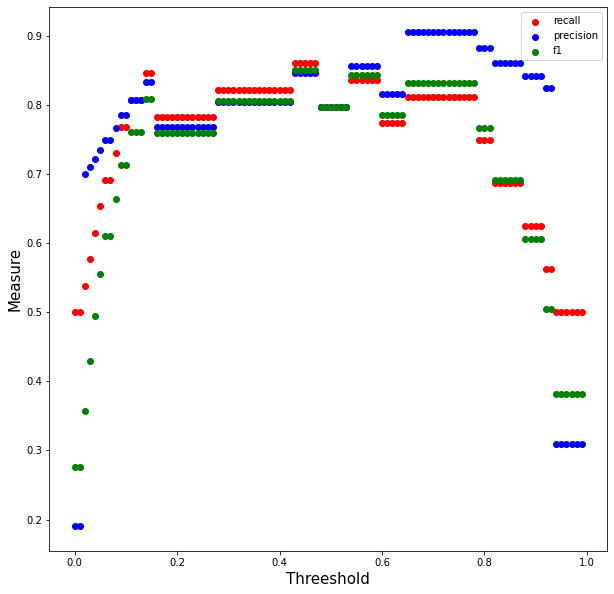

In [24]:
figure(figsize=(10, 10))

plt.scatter(all_th_1_left, recall_1_left, color = 'red', label = 'recall')
plt.scatter(all_th_1_left, precision_1_left, color = 'blue', label = 'precision')
plt.scatter(all_th_1_left, f1_1_left, color = 'green', label = 'f1')

plt.xlabel('Threeshold', size = 15)
plt.ylabel('Measure', size = 15)

plt.legend()
plt.show()

In [25]:
best_th_left_1 = all_th_1_left[precision_1_left.argmax()]

In [26]:
best_th_left_1

0.65

**b. Second section**

In [27]:
X_2_left = train[f_2]['X'].values - v
y_2_left = train[f_2]['y'].values

In [28]:
def gradient_method(theta_1_ini, N, c, X, y, eta):

    theta_1 = theta_1_ini

    M = len(X)

    for i in range(N):

        J_prime = 0

        for j in range(M):

            arg = theta_1*X[j] + c

            h = 1/(1 + np.exp(-arg))

            J_part_prime = - X[j]*y[j]*(1-h) + (1-y[j])*X[j]*h
            J_prime = J_prime + J_part_prime
        
        J_prime = (J_prime/M)

        theta_1 = theta_1 - eta*J_prime
    
    return theta_1

In [29]:
N = 1_000
beta_1_left_ini = 1
eta_left = 0.01

In [30]:
beta_1_left = gradient_method(beta_1_left_ini, N, alpha_1_left*v + alpha_0_left, X_2_left, y_2_left, eta_left)

Remembering:

$ \boxed{\textcolor{red}{\beta_0^{left}} = \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}} - \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v}} \ \ \ (1)  $

In [31]:
beta_0_left = alpha_1_left*v + alpha_0_left - beta_1_left*v

In [32]:
beta_1_left, beta_0_left

(-1.2202976292305285, 7.499311245808878)

_Determine the threshold:_

In [33]:
y_2_pred_left = 1/(1 + np.exp(- (beta_1_left*train[f_2]['X'].values + beta_0_left)))

In [34]:
recall_2_left = []
precision_2_left = []
f1_2_left = []

all_th_2_left = []

for i in range(100):

    t_h = i*0.01

    all_th_2_left.append(t_h)

    recall_2_left.append(recall_score(y_2_left, (y_2_pred_left > t_h)*1, average='macro'))
    precision_2_left.append(precision_score(y_2_left, (y_2_pred_left > t_h)*1, average='macro'))
    f1_2_left.append(f1_score(y_2_left, (y_2_pred_left > t_h)*1, average='macro'))

recall_2_left = np.array(recall_2_left)
precision_2_left = np.array(precision_2_left)
f1_2_left = np.array(f1_2_left)

all_th_2_left = np.array(all_th_2_left)

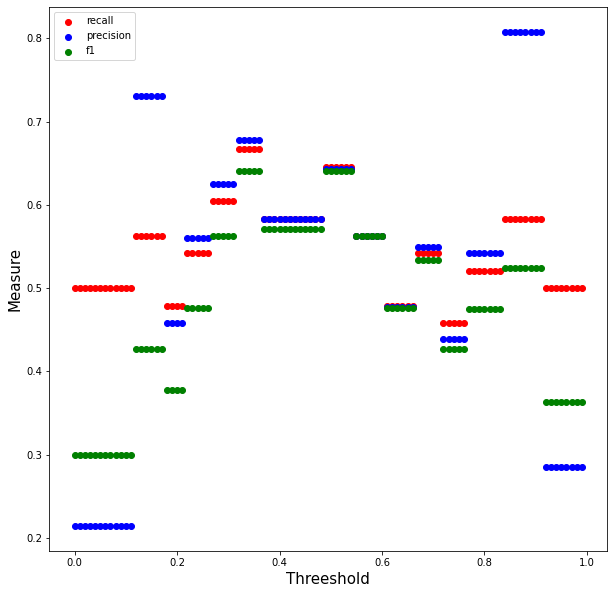

In [35]:
figure(figsize=(10, 10))

plt.scatter(all_th_2_left, recall_2_left, color = 'red', label = 'recall')
plt.scatter(all_th_2_left, precision_2_left, color = 'blue', label = 'precision')
plt.scatter(all_th_2_left, f1_2_left, color = 'green', label = 'f1')

plt.xlabel('Threeshold', size = 15)
plt.ylabel('Measure', size = 15)

plt.legend()
plt.show()

In [36]:
best_th_left_2 = all_th_2_left[precision_2_left.argmax()]

In [37]:
best_th_left_2

0.84

**c. Analysis of the resultant model**

In [38]:
df['arg_LR'] = (df['X'] <= v)*(alpha_1_left*df['X'] + alpha_0_left) + (df['X'] > v)*(beta_1_left*df['X'] + beta_0_left)

train['arg_LR'] = (train['X'] <= v)*(alpha_1_left*train['X'] + alpha_0_left) + (train['X'] > v)*(beta_1_left*train['X'] + beta_0_left)
test['arg_LR'] = (test['X'] <= v)*(alpha_1_left*test['X'] + alpha_0_left) + (test['X'] > v)*(beta_1_left*test['X'] + beta_0_left)

In [39]:
df['pred_proba_LR'] = 1/(1 + np.exp(-df['arg_LR']))

train['pred_proba_LR'] = 1/(1 + np.exp(-train['arg_LR']))
test['pred_proba_LR'] = 1/(1 + np.exp(-test['arg_LR']))

In [40]:
df['pred_LR'] = (df['X'] <= v)*(df['pred_proba_LR'] > best_th_left_1) + (df['X'] > v)*(df['pred_proba_LR'] > best_th_left_2)

train['pred_LR'] = (train['X'] <= v)*(train['pred_proba_LR'] > best_th_left_1) + (train['X'] > v)*(train['pred_proba_LR'] > best_th_left_2)
test['pred_LR'] = (test['X'] <= v)*(test['pred_proba_LR'] > best_th_left_1) + (test['X'] > v)*(test['pred_proba_LR'] > best_th_left_2)

Train:

In [41]:
print("Precision: ", round(precision_score(train['y'], train['pred_LR'], average = 'macro')*100, 2))
print("Recall: ", round(recall_score(train['y'], train['pred_LR'], average = 'macro')*100, 2))
print("F1: ", round(f1_score(train['y'], train['pred_LR'], average = 'macro')*100, 2))

Precision:  86.21
Recall:  71.43
F1:  72.0


Test:

In [42]:
print("Precision: ", round(precision_score(test['y'], test['pred_LR'], average = 'macro')*100, 2))
print("Recall: ", round(recall_score(test['y'], test['pred_LR'], average = 'macro')*100, 2))
print("F1: ", round(f1_score(test['y'], test['pred_LR'], average = 'macro')*100, 2))

Precision:  95.0
Recall:  92.86
F1:  93.52


**d. Graph of the resultant model**

In [43]:
df['th_left'] = (df['X'] <= v)*best_th_left_1 + (df['X'] > v)*best_th_left_2

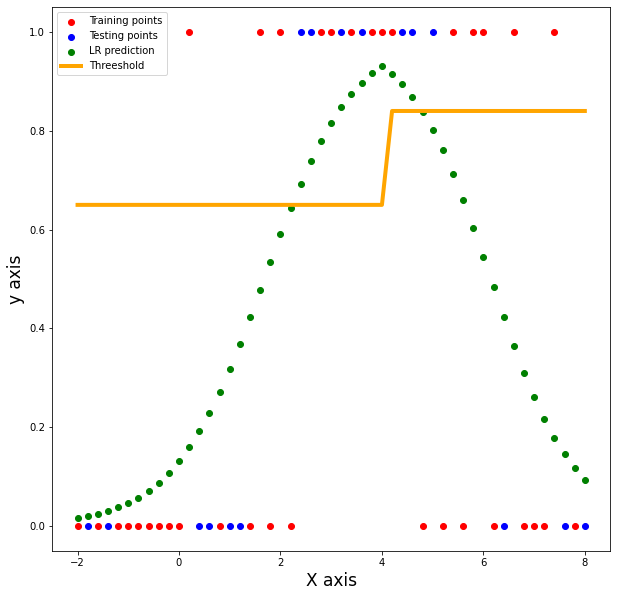

In [44]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')
plt.scatter(df['X'], df['pred_proba_LR'], color = 'green', label = 'LR prediction')

plt.plot(df['X'], df['th_left'], linewidth = 4, color = 'orange', label = 'Threeshold')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

### $ \underline{2. \ Right \ \ to \ \ the \ \ left:} $

We will consider two functions: 

$ f_1(x) = \cfrac{1}{1 + e^{-(\alpha_1^{right} \cdot x + \alpha_0^{right})}} \ \ \  $ for $ \ \ \ a \leq x \leq v $

$ f_2(x) = \cfrac{1}{1 + e^{-(\beta_1^{right} \cdot x + \beta_0^{right})}} \ \ \  $ for $ \ \ \ v \leq x \leq b $

*$\underline{Step \ 1:}$* We estimate the values of $ \beta_1^{right} $ and $ \beta_0^{right}$. From now on, we will write the known values with green color and the unkown values with red color.

*$\underline{Step \ 2:}$* For the union of the first and second function to be continued we need the following equation is fulfilled:

$ f_1(v) = f_2(v) $

$ \Rightarrow $

$ \cfrac{1}{1 + e^{-(\alpha_1^{right} \cdot v + \alpha_0^{right})}} = \cfrac{1}{1 + e^{-(\beta_1^{right} \cdot v + \beta_0^{right})}} $

$ \Rightarrow $

$ 1 + e^{-(\alpha_1^{right} \cdot v + \alpha_0^{right})} = 1 + e^{-(\beta_1^{right} \cdot v + \beta_0^{right})} $

$ \Rightarrow $

$ (\alpha_1^{right} \cdot v + \alpha_0^{right}) = (\beta_1^{right} \cdot v + \beta_0^{right}) $

$ \Rightarrow $

$ \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v} + \textcolor{red}{\alpha_0^{right}} = \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\alpha_0^{right}} = \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}} - \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v}} \ \ \ (2)  $

Substituting this result in $ f_1(x)$ we obtain:

$ f_1(x) = \cfrac{1}{1 + e^{-(\textcolor{red}{\alpha_1^{right}} \cdot x + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}} - \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v})}}  $ 

$ \Rightarrow $

$ f_1(x) = \cfrac{1}{1 + e^{-(\textcolor{red}{\alpha_1^{right}} \cdot [x - \textcolor{green}{v}] + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}})}}  $ 

We create the next new variable:

$ W_{1} = x - \textcolor{green}{v} $

Now we have:

$ f_1(x) = \cfrac{1}{1 + e^{-(\textcolor{red}{\alpha_1^{right}} \cdot [x - \textcolor{green}{v}] + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}})}}  $ 



We will procedure analogously to the mathematical devolepment of the "Left to Right Model".


# Training (Right to Left)

**a. Second section**

In [45]:
X_2_right = train[f_2][['X']].values
y_2_right = train[f_2]['y'].values

In [46]:
lreg_right_2 = LogisticRegression(random_state=0).fit(X_2_right, y_2_right)

In [47]:
beta_1_right = lreg_right_2.coef_[0][0]

In [48]:
beta_0_right = lreg_right_2.intercept_[0]

In [49]:
beta_1_right, beta_0_right

(-0.32790886075805736, 1.7193387324387803)

_Determine the threshold:_

In [50]:
y_2_pred_right = 1/(1 + np.exp(- (beta_1_right*X_2_right[:, 0] + beta_0_right)))

In [51]:
recall_2_right = []
precision_2_right = []
f1_2_right = []

all_th_2_right = []

for i in range(100):

    t_h = i*0.01

    all_th_2_right.append(t_h)

    recall_2_right.append(recall_score(y_2_right, (y_2_pred_right > t_h)*1, average='macro'))
    precision_2_right.append(precision_score(y_2_right, (y_2_pred_right > t_h)*1, average='macro'))
    f1_2_right.append(f1_score(y_2_right, (y_2_pred_right > t_h)*1, average='macro'))

recall_2_right = np.array(recall_2_right)
precision_2_right = np.array(precision_2_right)
f1_2_right = np.array(f1_2_right)

all_th_2_right = np.array(all_th_2_right)

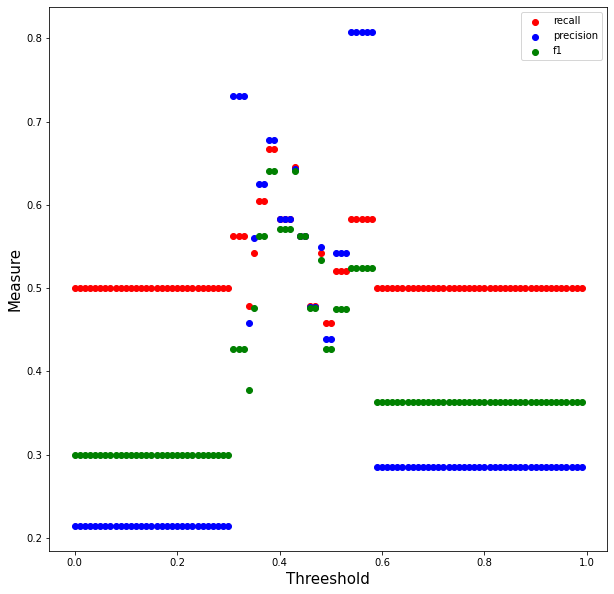

In [52]:
figure(figsize=(10, 10))

plt.scatter(all_th_2_right, recall_2_right, color = 'red', label = 'recall')
plt.scatter(all_th_2_right, precision_2_right, color = 'blue', label = 'precision')
plt.scatter(all_th_2_right, f1_2_right, color = 'green', label
 = 'f1')

plt.xlabel('Threeshold', size = 15)
plt.ylabel('Measure', size = 15)

plt.legend()
plt.show()

In [53]:
best_th_right_2 = all_th_2_right[precision_2_right.argmax()]

In [54]:
best_th_right_2

0.54

**b. First section**

In [55]:
X_1_right = train[f_1]['X'].values - v
y_1_right = train[f_1]['y'].values

In [56]:
N = 1_000
alpha_1_right_ini = 0.1
eta_right = 0.01

In [57]:
alpha_1_right = gradient_method(alpha_1_right_ini, N, beta_1_right*v + beta_0_right, X_1_right, y_1_right, eta_right)

Remembering:

$ \boxed{\textcolor{red}{\alpha_0^{right}} = \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}} - \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v}} \ \ \ (2)  $

In [58]:
alpha_0_right = beta_1_right*v + beta_0_right - alpha_1_right*v

In [59]:
alpha_1_right, alpha_0_right

(0.5136274544751488, -1.6468065284940443)

_Determine the threshold:_

In [60]:
y_1_pred_right = 1/(1 + np.exp(- (alpha_1_right*train[f_1]['X'].values + alpha_0_right)))

In [61]:
recall_1_right = []
precision_1_right = []
f1_1_right = []

all_th_1_right = []

for i in range(100):

    t_h = i*0.01

    all_th_1_right.append(t_h)

    recall_1_right.append(recall_score(y_1_right, (y_1_pred_right > t_h)*1, average='macro'))
    precision_1_right.append(precision_score(y_1_right, (y_1_pred_right > t_h)*1, average='macro'))
    f1_1_right.append(f1_score(y_1_right, (y_1_pred_right > t_h)*1, average='macro'))

recall_1_right = np.array(recall_1_right)
precision_1_right = np.array(precision_1_right)
f1_1_right = np.array(f1_1_right)

all_th_1_right = np.array(all_th_1_right)

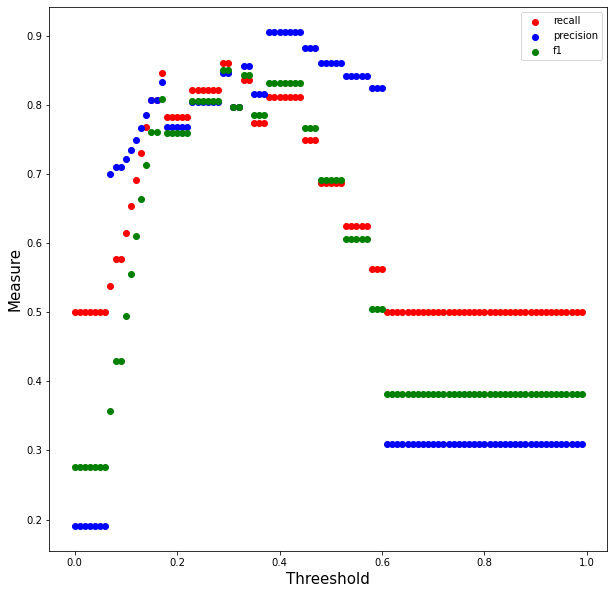

In [62]:
figure(figsize=(10, 10))

plt.scatter(all_th_1_right, recall_1_right, color = 'red', label = 'recall')
plt.scatter(all_th_1_right, precision_1_right, color = 'blue', label = 'precision')
plt.scatter(all_th_1_right, f1_1_right, color = 'green', label = 'f1')

plt.xlabel('Threeshold', size = 15)
plt.ylabel('Measure', size = 15)

plt.legend()
plt.show()

In [63]:
best_th_right_1 = all_th_1_right[precision_1_right.argmax()]

In [64]:
best_th_right_1

0.38

**c. Analysis of the resultant model**

In [65]:
df['arg_RL'] = (df['X'] <= v)*(alpha_1_right*df['X'] + alpha_0_right) + (df['X'] > v)*(beta_1_right*df['X'] + beta_0_right)

train['arg_RL'] = (train['X'] <= v)*(alpha_1_right*train['X'] + alpha_0_right) + (train['X'] > v)*(beta_1_right*train['X'] + beta_0_right)
test['arg_RL'] = (test['X'] <= v)*(alpha_1_right*test['X'] + alpha_0_right) + (test['X'] > v)*(beta_1_right*test['X'] + beta_0_right)

In [66]:
df['pred_proba_RL'] = 1/(1 + np.exp(-df['arg_RL']))

train['pred_proba_RL'] = 1/(1 + np.exp(-train['arg_RL']))
test['pred_proba_RL'] = 1/(1 + np.exp(-test['arg_RL']))

In [67]:
df['pred_RL'] = (df['X'] <= v)*(df['pred_proba_RL'] > best_th_right_1) + (df['X'] > v)*(df['pred_proba_RL'] > best_th_right_2)

train['pred_RL'] = (train['X'] <= v)*(train['pred_proba_RL'] > best_th_right_1) + (train['X'] > v)*(train['pred_proba_RL'] > best_th_right_2)
test['pred_RL'] = (test['X'] <= v)*(test['pred_proba_RL'] > best_th_right_1) + (test['X'] > v)*(test['pred_proba_RL'] > best_th_right_2)

Train:

In [68]:
print("Precision: ", round(precision_score(train['y'], train['pred_RL'], average = 'macro')*100, 2))
print("Recall: ", round(recall_score(train['y'], train['pred_RL'], average = 'macro')*100, 2))
print("F1: ", round(f1_score(train['y'], train['pred_RL'], average = 'macro')*100, 2))

Precision:  86.21
Recall:  71.43
F1:  72.0


Test:

In [69]:
print("Precision: ", round(precision_score(test['y'], test['pred_RL'], average = 'macro')*100, 2))
print("Recall: ", round(recall_score(test['y'], test['pred_RL'], average = 'macro')*100, 2))
print("F1: ", round(f1_score(test['y'], test['pred_RL'], average = 'macro')*100, 2))

Precision:  95.0
Recall:  92.86
F1:  93.52


**d. Graph of the resultant model**

In [70]:
df['th_right'] = (df['X'] <= v)*best_th_right_1 + (df['X'] > v)*best_th_right_2

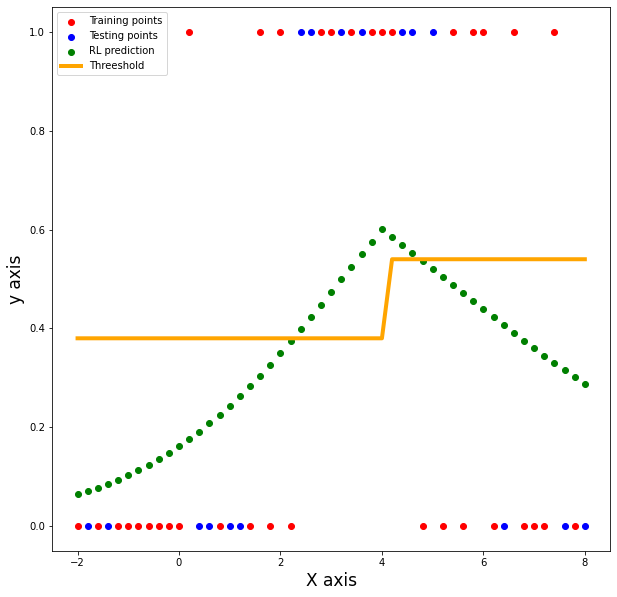

In [71]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')
plt.scatter(df['X'], df['pred_proba_RL'], color = 'green', label = 'RL prediction')

plt.plot(df['X'], df['th_right'], linewidth = 4, color = 'orange', label = 'Threeshold')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

# Graph comparision of both models

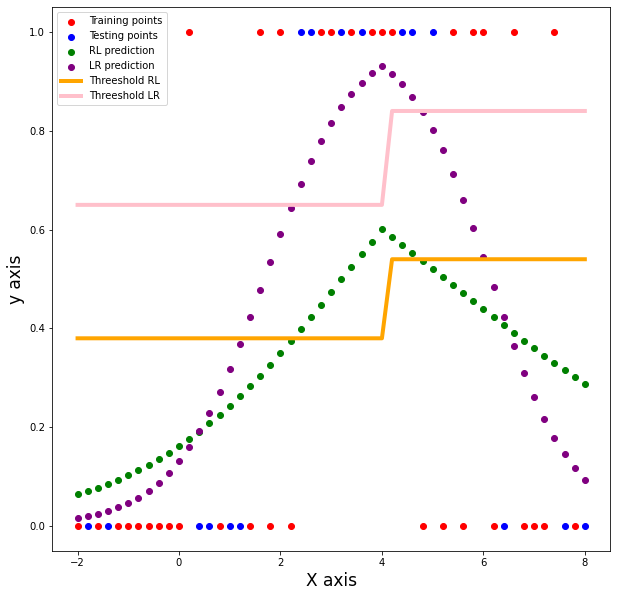

In [72]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')
plt.scatter(df['X'], df['pred_proba_RL'], color = 'green', label = 'RL prediction')
plt.scatter(df['X'], df['pred_proba_LR'], color = 'purple', label = 'LR prediction')

plt.plot(df['X'], df['th_right'], linewidth = 4, color = 'orange', label = 'Threeshold RL')
plt.plot(df['X'], df['th_left'], linewidth = 4, color = 'pink', label = 'Threeshold LR')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()